# Laboratorio 8
### Word Embeddings
##### Deep learning
- Jose Daniel Gomez Cabrera 21429

### Inciso A
Emplee la función Word2Vec de la librería gensim para generar embeddings a partir de los documentos del dataset. Elija los mejores valores a su opinion para cada uno de los parametros de la funcion (vector_size, window, min_count, workers).

In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import re
import chardet

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = simple_preprocess(text)
    # Remove stopwords and short words
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Detect file encoding
with open('reviews_data.txt', 'rb') as file:
    raw_data = file.read()
    detected_encoding = chardet.detect(raw_data)['encoding']

print(f"Detected encoding: {detected_encoding}")

# Read and preprocess the reviews
try:
    with open('reviews_data.txt', 'r', encoding=detected_encoding) as file:
        reviews = file.readlines()
except UnicodeDecodeError:
    print("Error: Unable to decode the file with the detected encoding.")
    print("Trying with 'latin-1' encoding...")
    with open('reviews_data.txt', 'r', encoding='latin-1') as file:
        reviews = file.readlines()

processed_reviews = [preprocess_text(review) for review in reviews]

# Train the Word2Vec model
model = Word2Vec(
    sentences=processed_reviews,
    vector_size=300,
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

# Train the model
model.train(processed_reviews, total_examples=len(processed_reviews), epochs=10)

# Save the model
model.save("hotel_reviews_word2vec.model")

# Example usage
print("Most similar words to 'hotel':")
print(model.wv.most_similar('hotel', topn=5))

print("\nMost similar words to 'clean':")
print(model.wv.most_similar('clean', topn=5))

print("\nMost similar words to 'service':")
print(model.wv.most_similar('service', topn=5))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jdgomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Detected encoding: MacRoman
Most similar words to 'hotel':
[('location', 0.5995397567749023), ('place', 0.5892414450645447), ('stay', 0.5473924279212952), ('great', 0.5448023676872253), ('property', 0.5444987416267395)]

Most similar words to 'clean':
[('spotless', 0.6907875537872314), ('immaculate', 0.6203452348709106), ('superclean', 0.5869873762130737), ('adeqate', 0.5733451843261719), ('comfortable', 0.573300838470459)]

Most similar words to 'service':
[('serive', 0.5834483504295349), ('sevice', 0.5717345476150513), ('serice', 0.5455355048179626), ('services', 0.5433555245399475), ('serivce', 0.5196114182472229)]


### Inciso B
Usando los embeddings generados, aplica la función most_similar para encontrar las 10 palabras más similares a cada una de las siguientes:

• Street

• Good

• Dog

• Mother

• Bed

In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import chardet

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = simple_preprocess(text)
    # Remove stopwords and short words
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Detect file encoding
with open('reviews_data.txt', 'rb') as file:
    raw_data = file.read()
    detected_encoding = chardet.detect(raw_data)['encoding']

print(f"Detected encoding: {detected_encoding}")

# Read and preprocess the reviews
try:
    with open('reviews_data.txt', 'r', encoding=detected_encoding) as file:
        reviews = file.readlines()
except UnicodeDecodeError:
    print("Error: Unable to decode the file with the detected encoding.")
    print("Trying with 'latin-1' encoding...")
    with open('reviews_data.txt', 'r', encoding='latin-1') as file:
        reviews = file.readlines()

processed_reviews = [preprocess_text(review) for review in reviews]

# Train the Word2Vec model
model = Word2Vec(
    sentences=processed_reviews,
    vector_size=300,
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

# Train the model
model.train(processed_reviews, total_examples=len(processed_reviews), epochs=10)

# Save the model
model.save("hotel_reviews_word2vec.model")

# Function to find similar words and handle KeyError
def find_similar_words(word, topn=10):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return f"'{word}' not in vocabulary"

# List of words to find similar words for
target_words = ['street', 'good', 'dog', 'mother', 'bed']

# Find and print similar words for each target word
for word in target_words:
    print(f"\nMost similar words to '{word}':")
    similar_words = find_similar_words(word)
    if isinstance(similar_words, str):
        print(similar_words)
    else:
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jdgomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Detected encoding: MacRoman

Most similar words to 'street':
road: 0.6641
stree: 0.5674
jamestown: 0.5665
chrystie: 0.5608
block: 0.5560
mcallister: 0.5560
streets: 0.5517
gloucestor: 0.5453
stret: 0.5451
templeton: 0.5371

Most similar words to 'good':
great: 0.7790
excellent: 0.7418
decent: 0.6747
nice: 0.6265
fantastic: 0.5668
greate: 0.5154
reasonable: 0.5154
cleangood: 0.5122
really: 0.5117
ecellent: 0.5097

Most similar words to 'dog':
dogs: 0.6826
pet: 0.6226
barking: 0.5631
pets: 0.5325
pooch: 0.4471
kennel: 0.4421
leash: 0.4249
pup: 0.4035
chihuahua: 0.3989
doggy: 0.3867

Most similar words to 'mother':
daughter: 0.6574
mom: 0.6475
husband: 0.6405
law: 0.6347
wife: 0.6279
father: 0.6246
mum: 0.6046
yearold: 0.5925
friend: 0.5907
neice: 0.5805

Most similar words to 'bed':
beds: 0.7813
soooooooooooo: 0.5916
mattress: 0.5894
sigle: 0.5690
comfortor: 0.5681
goosedown: 0.5637
comfty: 0.5604
bedding: 0.5529
beding: 0.5510
duvet: 0.5479


### Inciso C
Extrae los embeddings de estas 55 palabras (las 5 palabras iniciales más sus 10 palabras similares cada una).

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import chardet
import numpy as np

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = simple_preprocess(text)
    # Remove stopwords and short words
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Detect file encoding
with open('reviews_data.txt', 'rb') as file:
    raw_data = file.read()
    detected_encoding = chardet.detect(raw_data)['encoding']

print(f"Detected encoding: {detected_encoding}")

# Read and preprocess the reviews
try:
    with open('reviews_data.txt', 'r', encoding=detected_encoding) as file:
        reviews = file.readlines()
except UnicodeDecodeError:
    print("Error: Unable to decode the file with the detected encoding.")
    print("Trying with 'latin-1' encoding...")
    with open('reviews_data.txt', 'r', encoding='latin-1') as file:
        reviews = file.readlines()

processed_reviews = [preprocess_text(review) for review in reviews]

# Train the Word2Vec model
model = Word2Vec(
    sentences=processed_reviews,
    vector_size=300,
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

# Train the model
model.train(processed_reviews, total_examples=len(processed_reviews), epochs=10)

# Function to find similar words and handle KeyError
def find_similar_words(word, topn=10):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        return [word] + [w for w, _ in similar_words]
    except KeyError:
        return []

# List of initial target words
target_words = ['street', 'good', 'dog', 'mother', 'bed']

# Find similar words for each target word
all_words = []
for word in target_words:
    all_words.extend(find_similar_words(word))

# Remove duplicates while preserving order
all_words = list(dict.fromkeys(all_words))

# Extract embeddings
embeddings = {}
for word in all_words:
    try:
        embeddings[word] = model.wv[word]
    except KeyError:
        print(f"Warning: '{word}' not in vocabulary")

# Print results
print(f"\nTotal words: {len(embeddings)}")
print("Words and their embedding shapes:")
for word, embedding in embeddings.items():
    print(f"{word}: {embedding.shape}")

# Optional: Save embeddings to a file
np.save('word_embeddings.npy', embeddings)
print("\nEmbeddings saved to 'word_embeddings.npy'")

# Example: Print the first 5 dimensions of the embedding for 'street'
if 'street' in embeddings:
    print("\nFirst 5 dimensions of 'street' embedding:")
    print(embeddings['street'][:5])
else:
    print("\n'street' not found in embeddings")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jdgomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Detected encoding: MacRoman

Total words: 55
Words and their embedding shapes:
street: (300,)
road: (300,)
stree: (300,)
templeton: (300,)
streets: (300,)
block: (300,)
gloucestor: (300,)
ogilvie: (300,)
jamestown: (300,)
stret: (300,)
mcallister: (300,)
good: (300,)
great: (300,)
excellent: (300,)
decent: (300,)
nice: (300,)
fantastic: (300,)
ecellent: (300,)
cleangood: (300,)
reasonable: (300,)
location: (300,)
staffgood: (300,)
dog: (300,)
dogs: (300,)
pet: (300,)
barking: (300,)
pets: (300,)
pooch: (300,)
kennel: (300,)
yorkie: (300,)
leash: (300,)
pup: (300,)
pooches: (300,)
mother: (300,)
daughter: (300,)
mom: (300,)
father: (300,)
law: (300,)
wife: (300,)
husband: (300,)
yearold: (300,)
mum: (300,)
sister: (300,)
neice: (300,)
bed: (300,)
beds: (300,)
mattress: (300,)
sigle: (300,)
soooooooooooo: (300,)
beding: (300,)
goosedown: (300,)
showeroom: (300,)
bedding: (300,)
sofa: (300,)
comfty: (300,)

Embeddings saved to 'word_embeddings.npy'

First 5 dimensions of 'street' embeddin

### Inciso D
Aplica PCA para reducir la dimensionalidad de los embeddings a 2 componentes principales.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jdgomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


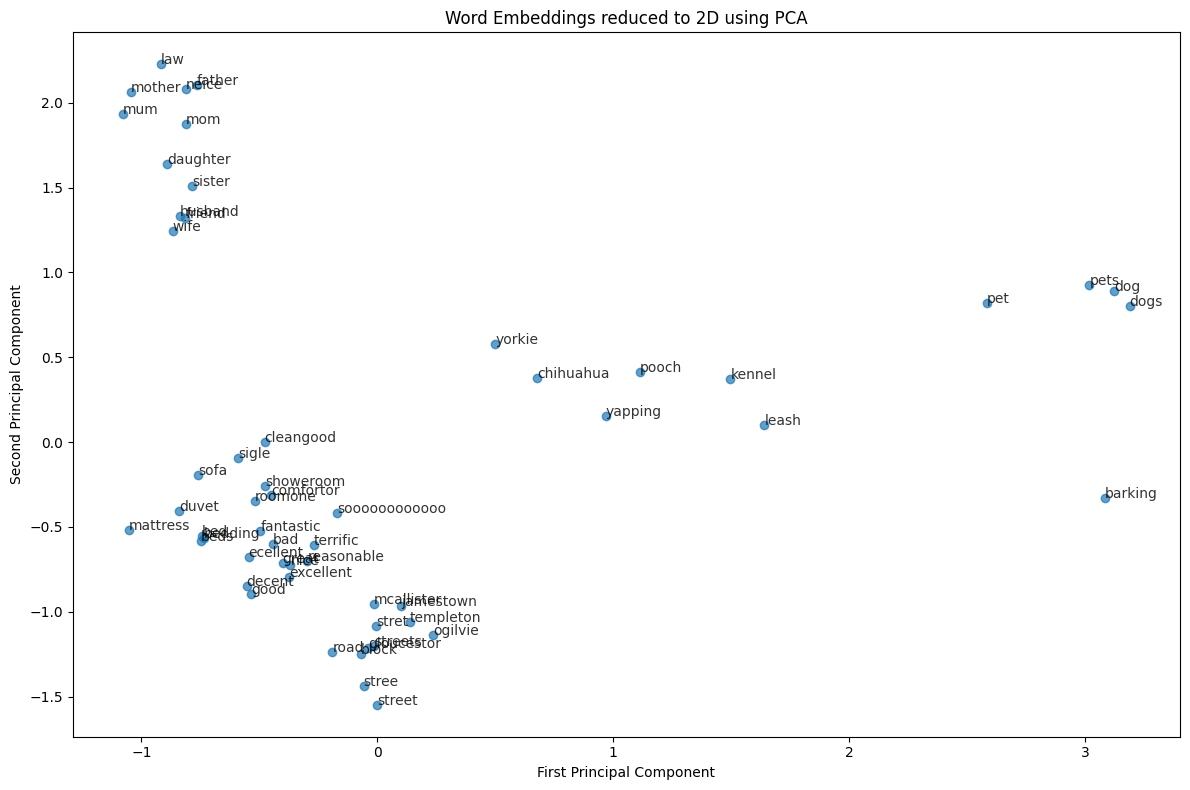

PCA explained variance ratio: [0.14099859 0.12688747]
Total variance explained: 0.26788605749607086

Reduced embeddings saved to 'reduced_word_embeddings_2d.npy'


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import chardet
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = simple_preprocess(text)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Detect file encoding and read reviews (same as before)
with open('reviews_data.txt', 'rb') as file:
    raw_data = file.read()
    detected_encoding = chardet.detect(raw_data)['encoding']

try:
    with open('reviews_data.txt', 'r', encoding=detected_encoding) as file:
        reviews = file.readlines()
except UnicodeDecodeError:
    print("Error: Unable to decode the file with the detected encoding.")
    print("Trying with 'latin-1' encoding...")
    with open('reviews_data.txt', 'r', encoding='latin-1') as file:
        reviews = file.readlines()

processed_reviews = [preprocess_text(review) for review in reviews]

# Train the Word2Vec model (same as before)
model = Word2Vec(
    sentences=processed_reviews,
    vector_size=300,
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

model.train(processed_reviews, total_examples=len(processed_reviews), epochs=10)

def find_similar_words(word, topn=10):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        return [word] + [w for w, _ in similar_words]
    except KeyError:
        return []

# List of initial target words
target_words = ['street', 'good', 'dog', 'mother', 'bed']

# Find similar words for each target word
all_words = []
for word in target_words:
    all_words.extend(find_similar_words(word))

# Remove duplicates while preserving order
all_words = list(dict.fromkeys(all_words))

# Extract embeddings
embeddings = {}
for word in all_words:
    try:
        embeddings[word] = model.wv[word]
    except KeyError:
        print(f"Warning: '{word}' not in vocabulary")

# Convert embeddings to a 2D numpy array
words = list(embeddings.keys())
embedding_matrix = np.array([embeddings[word] for word in words])

# Apply PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Plot the reduced embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), alpha=0.8)

plt.title("Word Embeddings reduced to 2D using PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.tight_layout()
plt.savefig('word_embeddings_2d.png')
plt.show()

print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# Save the reduced embeddings
reduced_embeddings_dict = {word: reduced_embeddings[i] for i, word in enumerate(words)}
np.save('reduced_word_embeddings_2d.npy', reduced_embeddings_dict)
print("\nReduced embeddings saved to 'reduced_word_embeddings_2d.npy'")

### Inciso E
Crea un gráfico de dispersión (scatter plot) con estos 2 componentes y describe los resultados obtenidos. Su gráfico debería verse similar a este ejemplo:

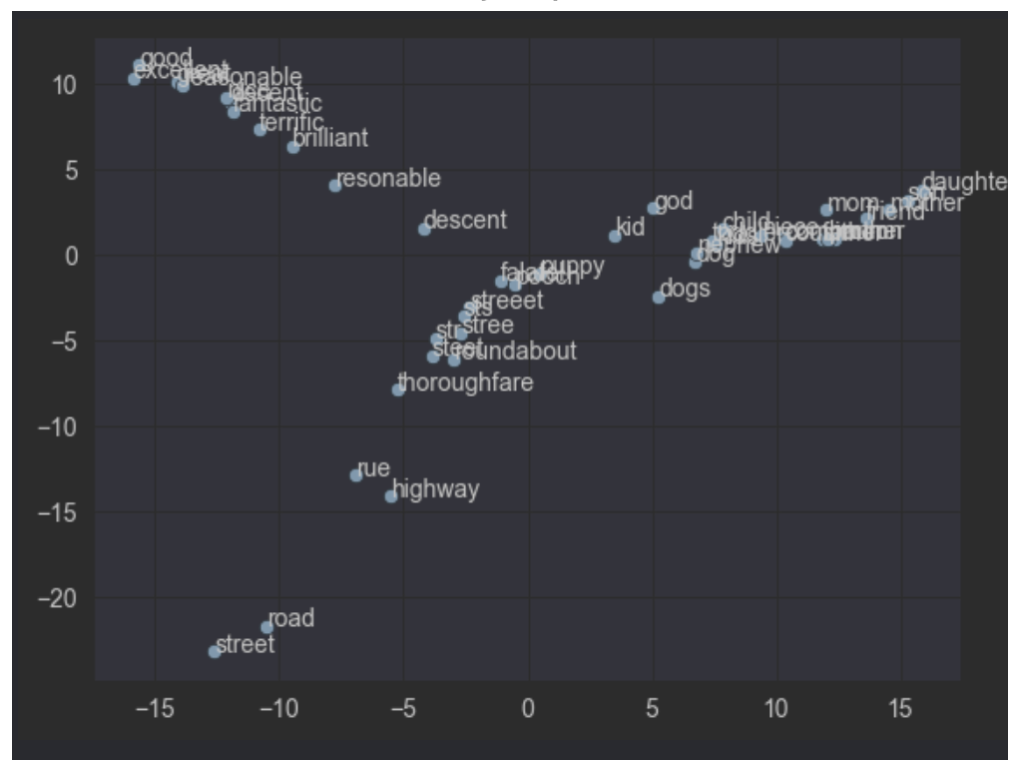

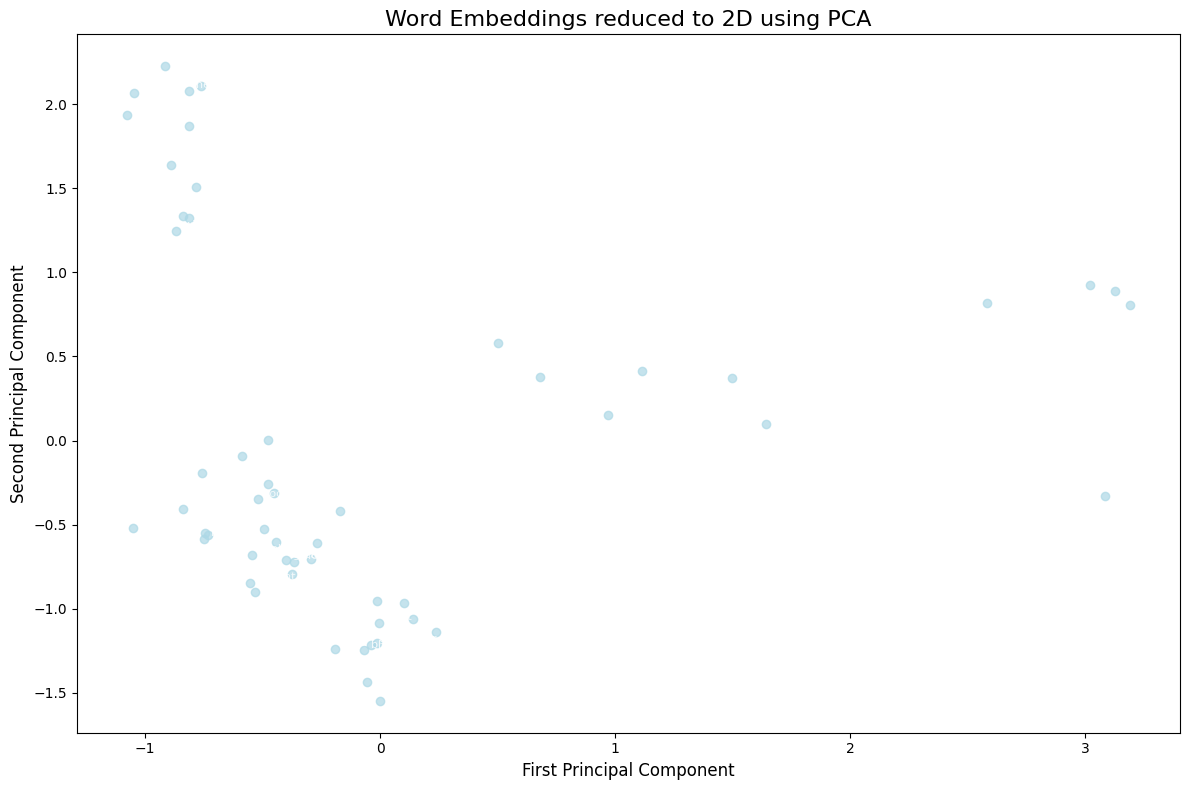

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Load the reduced embeddings
reduced_embeddings = np.load('reduced_word_embeddings_2d.npy', allow_pickle=True).item()

# Prepare data for plotting
words = list(reduced_embeddings.keys())
x = [reduced_embeddings[word][0] for word in words]
y = [reduced_embeddings[word][1] for word in words]

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.7, color='lightblue')

# Set dark background
plt.style.use('dark_background')

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]), xytext=(5, 2), textcoords='offset points', fontsize=8, alpha=0.8)

# Set labels and title
plt.title("Word Embeddings reduced to 2D using PCA", fontsize=16)
plt.xlabel("First Principal Component", fontsize=12)
plt.ylabel("Second Principal Component", fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig('word_embeddings_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
